<a href="https://colab.research.google.com/github/thiiagofernando/ocr_opencv_python/blob/master/Curso_Visual_Computacional_OCR_OpenCv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python==4.6.0.66
!sudo apt install tesseract-ocr
!pip install pytesseract==0.3.9

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 11.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.8.0.76
    Uninstalling opencv-python-4.8.0.76:
      Successfully uninstalled opencv-python-4.8.0.76
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu ja

In [2]:
! git clone https://github.com/sthemonica/text-recognize

Cloning into 'text-recognize'...
remote: Enumerating objects: 148, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 148 (delta 3), reused 1 (delta 1), pack-reused 144
Receiving objects: 100% (148/148), 37.21 MiB | 30.12 MiB/s, done.
Resolving deltas: 100% (35/35), done.


In [3]:
import pytesseract
import numpy as np
import cv2
from google.colab.patches import cv2_imshow


In [4]:
pytesseract.__version__

'0.3.9'

In [5]:
cv2.__version__

'4.6.0'

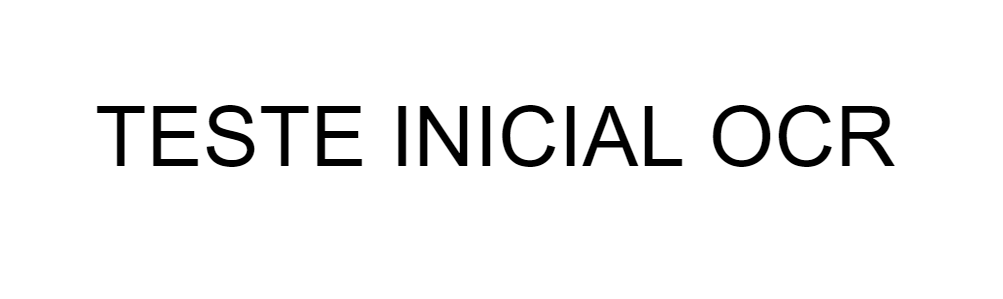

In [6]:
img = cv2.imread('/content/text-recognize/Imagens/Aula1-teste.png')
cv2_imshow(img)

In [7]:
texto = pytesseract.image_to_string(img)
print(texto)

TESTE INICIAL OCR



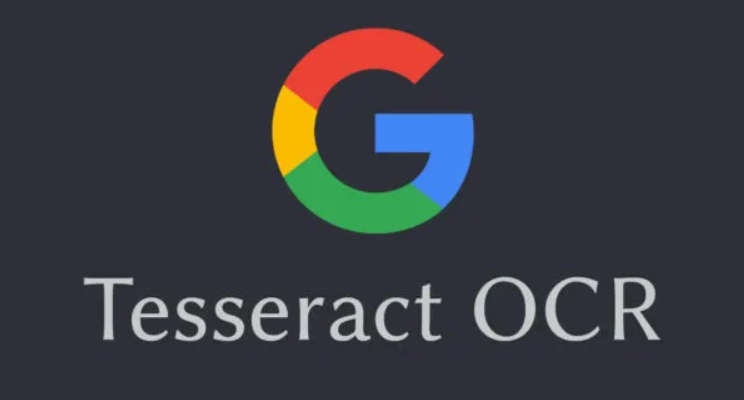

In [8]:
img = cv2.imread('/content/text-recognize/Imagens/Aula1-ocr.png')
cv2_imshow(img)

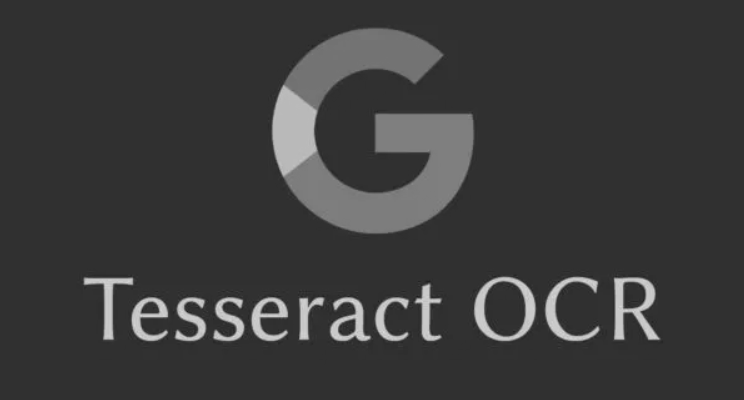

In [9]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(rgb)

In [10]:
texto = pytesseract.image_to_string(rgb)
print(texto)

C

Tesseract OCR



In [11]:
!tesseract --list-langs

List of available languages (2):
eng
osd


In [12]:
!apt-get install tesseract-ocr-por

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-por
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 856 kB of archives.
After this operation, 1,998 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-por all 1:4.00~git30-7274cfa-1.1 [856 kB]
Fetched 856 kB in 0s (2,865 kB/s)
Selecting previously unselected package tesseract-ocr-por.
(Reading database ... 121967 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-por_1%3a4.00~git30-7274cfa-1.1_all.deb ...
Unpacking tesseract-ocr-por (1:4.00~git30-7274cfa-1.1) ...
Setting up tesseract-ocr-por (1:4.00~git30-7274cfa-1.1) ...


In [13]:
!mkdir tessdata

In [14]:
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
!wget -O ./tessdata/eng.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true


--2024-05-04 18:37:28--  https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata [following]
--2024-05-04 18:37:28--  https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata [following]
--2024-05-04 18:37:28--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awa

In [15]:
config_tesseract = '--tessdata-dir tessdata'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

G

Tesseract OCR



In [16]:
img = cv2.imread('/content/text-recognize/Imagens/Aula2-undersampling.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
texto = pytesseract.image_to_string(rgb,lang='por')
print(texto)

Undersampling

É uma técnica que consiste em manter todos os dados da classe com menor frequência e
diminuir a quantidade dos que estão na classe de maior frequência, fazendo com que as
observações no conjunto possuam dados com a variável alvo equilibrada.



In [17]:
!tesseract --help-psm

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR. (not implemented)
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


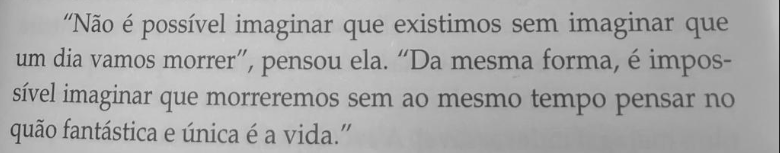

In [18]:
img = cv2.imread('/content/text-recognize/Imagens/Aula2-trecho-livro.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(rgb)

In [19]:
config_tesseract = '--tessdata-dir tessdata --psm 6'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

“Não é possível imaginar que existimos sem imaginar que
um dia vamos morrer”, pensou ela. “Da mesma forma, é impos-
sível imaginar que morreremos sem ao mesmo tempo pensar no
quão fantástica e única é a vida.”



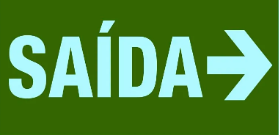

SAÍDAS



In [20]:
img = cv2.imread('/content/text-recognize/Imagens/Aula2-Saida.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

config_tesseract = '--tessdata-dir tessdata --psm 6'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

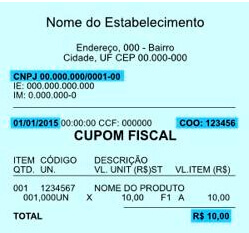

Nome do Estabelecimento

Endereço, 090 - Bairro,
(cidade. UF CEP 00.000-000

100:00 CCfF: 000000

CUPOM FISCAL
mEM cóDIGO — DESCRIÇÃO
m. UN VCUNTIRSIST VLTEM(RS)

1001 1234667 — NOMEDO PRODUTO
OOOOOUN Xó 1000 FLA — 1000

ToraL Fs



In [21]:
## Importando a imagem
img = cv2.imread('/content/text-recognize/Atividades/Aula2-Nota_Fiscal.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)


config_tesseract = '--tessdata-dir tessdata --psm 4'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

In [22]:
from PIL import Image
import matplotlib.pyplot as plt

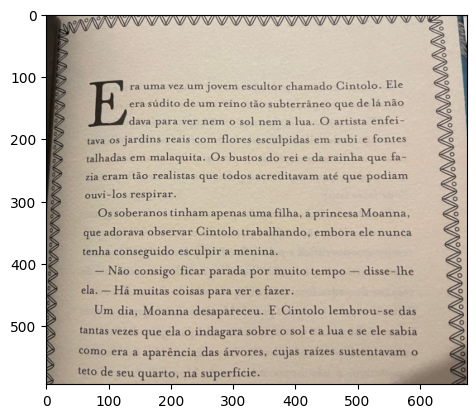

In [23]:
img = Image.open('/content/text-recognize/Imagens/Aula2-livro.png')
plt.imshow(img);


In [24]:
print(pytesseract.image_to_osd(img))

Page number: 0
Orientation in degrees: 0
Rotate: 0
Orientation confidence: 0.93
Script: Latin
Script confidence: 2.46



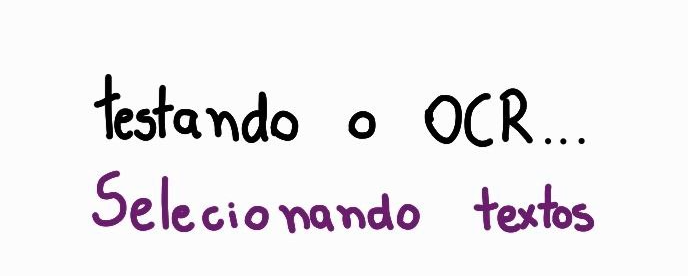

In [25]:
img = cv2.imread('/content/text-recognize/Imagens/Aula3-testando.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)


In [26]:
from pytesseract import Output


In [27]:
config_tesseract = '--tessdata-dir tessdata'
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang='por', output_type=Output.DICT)
resultado


{'level': [1, 2, 3, 4, 5, 5, 5, 4, 5, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 1, 1, 2, 2, 2],
 'word_num': [0, 0, 0, 0, 1, 2, 3, 0, 1, 2],
 'left': [0, 92, 92, 94, 94, 348, 425, 92, 92, 474],
 'top': [0, 74, 74, 74, 74, 111, 88, 171, 171, 184],
 'width': [688, 502, 502, 491, 204, 28, 160, 502, 328, 120],
 'height': [276, 159, 159, 73, 69, 28, 59, 62, 62, 49],
 'conf': ['-1', '-1', '-1', '-1', 63, 90, 48, '-1', 85, 77],
 'text': ['',
  '',
  '',
  '',
  'Testando',
  'o',
  'OCR..',
  '',
  'Selecionando',
  'textos']}

In [28]:
min_conf = 40 #@param {type: 'slider', min: 0, max: 100}

In [29]:
def caixa_texto(resultado, img, cor = (255, 100, 0)):
  x = resultado['left'][i]
  y = resultado['top'][i]
  w = resultado['width'][i]
  h = resultado['height'][i]

  cv2.rectangle(img, (x, y), (x+w, y+h), cor, 2)

  return x, y, img


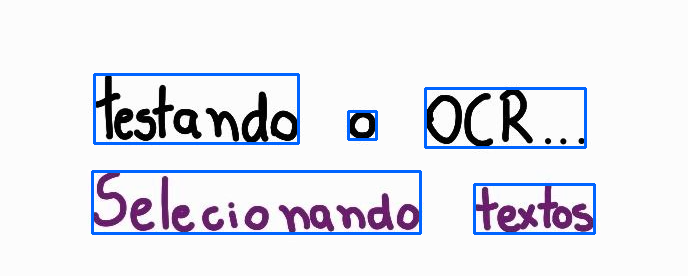

In [30]:
img_copia = rgb.copy()
for i in range(len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    x, y, img = caixa_texto(resultado, img_copia)
cv2_imshow(img_copia)

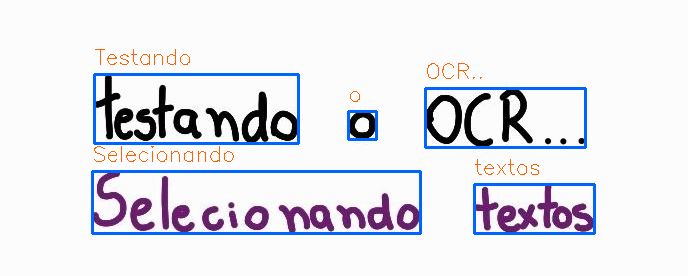

In [31]:
img_copia = rgb.copy()
for i in range(len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    x, y, img = caixa_texto(resultado, img_copia)
    texto = resultado['text'][i]
    cv2.putText(img_copia, texto, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,100,255))

cv2_imshow(img_copia)

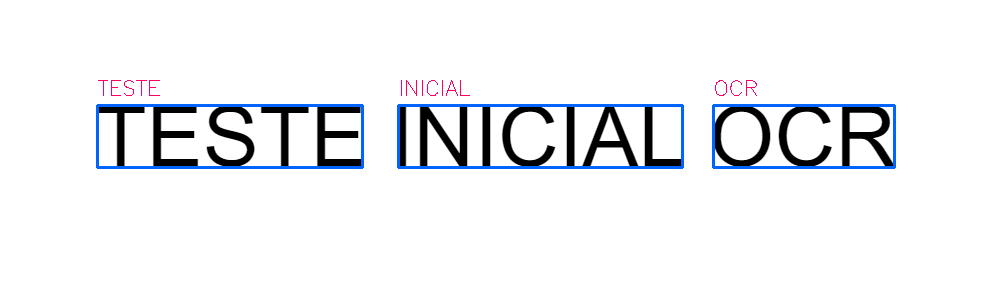

In [32]:
img = cv2.imread('/content/text-recognize/Imagens/Aula1-teste.png')

config_tesseract = '--tessdata-dir tessdata'
resultado = pytesseract.image_to_data(img, config=config_tesseract, lang='por', output_type=Output.DICT)

img_copia = img.copy()
for i in range(len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    x, y, img = caixa_texto(resultado, img_copia)

    texto = resultado['text'][i]
    cv2.putText(img_copia, texto, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (100,0,255))

cv2_imshow(img_copia)

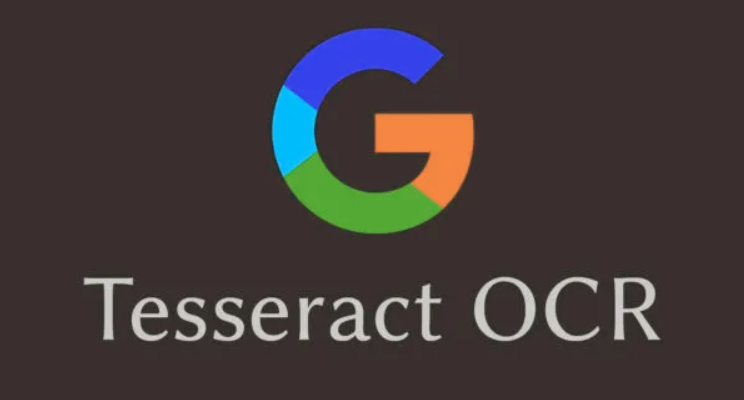

In [33]:
img = cv2.imread('/content/text-recognize/Imagens/Aula1-ocr.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)


In [34]:
config_tesseract = '--tessdata-dir tessdata'
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang='por', output_type=Output.DICT)
resultado

{'level': [1, 2, 3, 4, 5, 2, 3, 4, 5, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 2, 2, 2, 2, 2],
 'par_num': [0, 0, 1, 1, 1, 0, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 0, 0, 1, 1, 1],
 'word_num': [0, 0, 0, 0, 1, 0, 0, 0, 1, 2],
 'left': [0, 272, 272, 272, 272, 84, 84, 84, 84, 474],
 'top': [0, 28, 28, 28, 28, 277, 277, 277, 278, 277],
 'width': [744, 202, 202, 202, 202, 576, 576, 576, 357, 186],
 'height': [400, 205, 205, 205, 205, 64, 64, 64, 63, 64],
 'conf': ['-1', '-1', '-1', '-1', 91, '-1', '-1', '-1', 91, 90],
 'text': ['', '', '', '', 'G', '', '', '', 'Tesseract', 'OCR']}

In [35]:
from PIL import ImageFont, ImageDraw, Image

fonte = '/content/text-recognize/Imagens/calibri.ttf'


In [36]:
def escreve_texto(texto, x, y, img, fonte, tamanho_texto=32):
  fonte = ImageFont.truetype(fonte, tamanho_texto)
  img_pil = Image.fromarray(img)
  draw = ImageDraw.Draw(img_pil)
  draw.text((x, y - tamanho_texto), texto, font = fonte)
  img = np.array(img_pil)
  return img

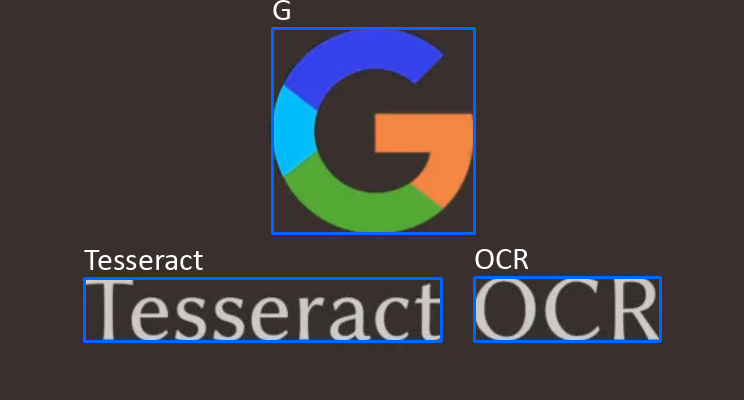

In [37]:
img_copia = rgb.copy()
for i in range(len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    x, y, img = caixa_texto(resultado, img_copia)

    texto = resultado['text'][i]
    #cv2.putText(img_copia, texto, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,100,255))
    img_copia = escreve_texto(texto, x, y, img_copia, fonte)

cv2_imshow(img_copia)


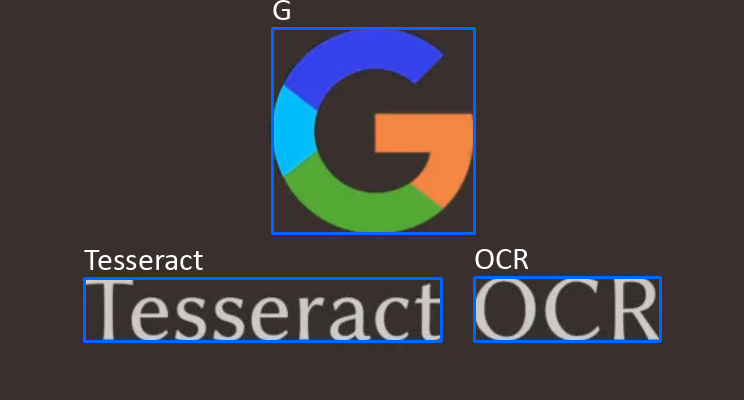

True

In [38]:
import os
os.makedirs('images_tesseract', exist_ok=True)
cv2_imshow(img_copia)
logo_tesseract = '/content/images_tesseract/logo_tesseract.png'
cv2.imwrite(logo_tesseract, img_copia)

In [39]:
import re

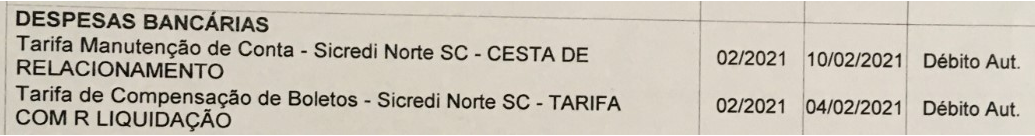

In [40]:
img = cv2.imread('/content/text-recognize/Imagens/Aula4-tabela_teste.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [42]:
config_tesseract = "--tessdata-dir tessdata"
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang="por", output_type=Output.DICT)
resultado


{'level': [1,
  2,
  3,
  4,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  5],
 'page_num': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'block_num': [0,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  3,
  3,
  3,
  3],
 'par_num': [0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  

In [43]:
padrao_data = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'


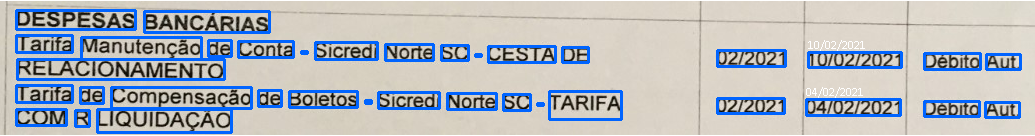

In [44]:
img_copia = rgb.copy()
for i in range(0, len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    texto = resultado['text'][i]

    if re.match(padrao_data, texto):
      x, y, img = caixa_texto(resultado, img_copia)
      img_copia = escreve_texto(texto, x, y, img_copia, fonte, 12)
    else:
      x, y, img_copia = caixa_texto(resultado, img_copia)

cv2_imshow(img_copia)


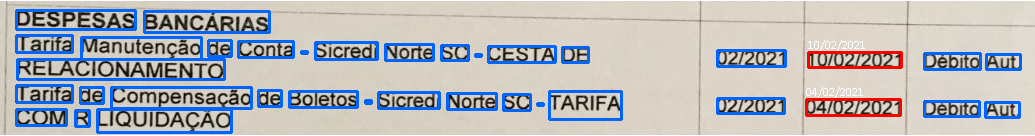

In [55]:
datas = []
img_copia = rgb.copy()
for i in range(0, len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    texto = resultado['text'][i]

    if re.match(padrao_data, texto):
      x, y, img = caixa_texto(resultado, img_copia, (0,0,255))
      img_copia = escreve_texto(texto, x, y, img_copia, fonte, 12)
      datas.append(texto)
    else:
      x, y, img_copia = caixa_texto(resultado, img_copia)

cv2_imshow(img_copia)


In [46]:
datas

['10/02/2021', '04/02/2021']

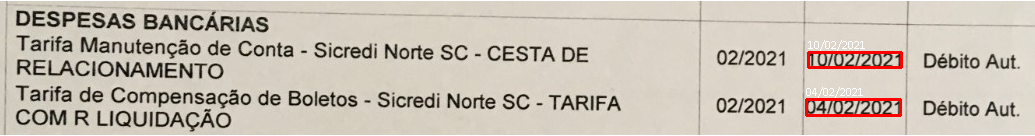

['10/02/2021', '04/02/2021']

In [56]:
datas = []
img_copia = rgb.copy()
for i in range(0, len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    texto = resultado['text'][i]

    if re.match(padrao_data, texto):
      x, y, img = caixa_texto(resultado, img_copia, (0,0,255))
      img_copia = escreve_texto(texto, x, y, img_copia, fonte, 12)
      datas.append(texto)

cv2_imshow(img_copia)
datas

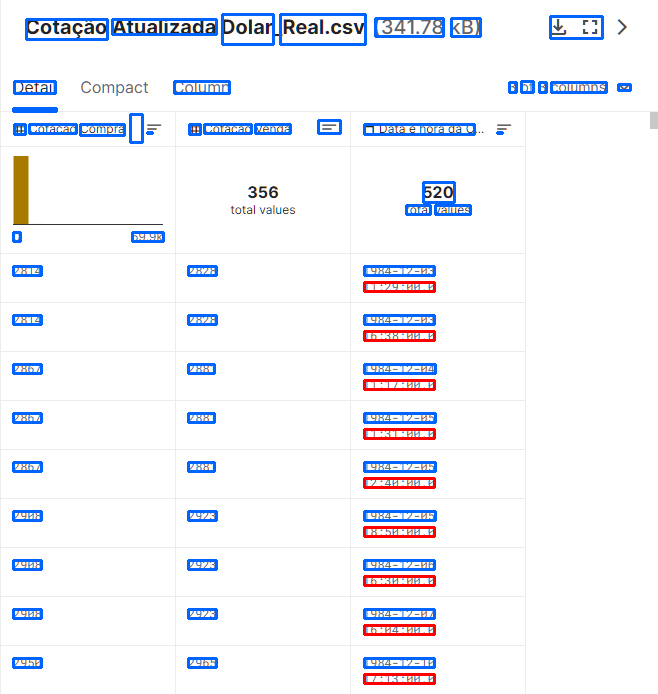

In [62]:
import re
horas = []
min_conf = 25
config_tesseract = "--tessdata-dir tessdata"
padrao_hora = '([01]?[0-9]|2[0-3]):[0-5][0-9](:[0-5][0-9])?'

img = cv2.imread('/content/text-recognize/Atividades/Aula4_cotacao.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang="por", output_type=Output.DICT)

img_copia = rgb.copy()
for i in range(0, len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    texto = resultado['text'][i]
    if re.match(padrao_hora, texto):
      x, y, img = caixa_texto(resultado, img_copia, (0,0,255))
      horas.append(texto)
    else:
      x, y, img_copia = caixa_texto(resultado, img_copia)
cv2_imshow(img_copia)

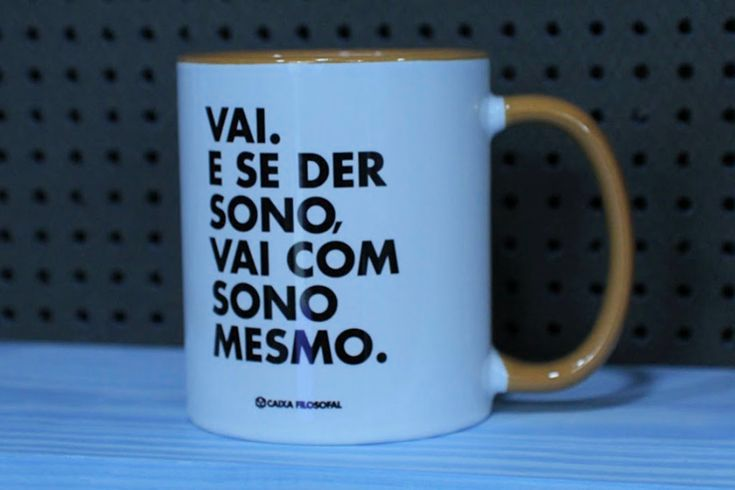

In [63]:
img = cv2.imread('/content/text-recognize/Imagens/Aula4-caneca2.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)


In [65]:
config_tesseract = '--tessdata-dir tessdata --psm 6'


In [66]:
min_conf = 40 #@param {type: 'slider', min: 0, max: 100}


In [67]:
resultado = pytesseract.image_to_data(rgb, lang="por", output_type=Output.DICT, config=config_tesseract)
resultado


{'level': [1,
  2,
  3,
  4,
  5,
  5,
  3,
  4,
  5,
  5,
  5,
  3,
  4,
  5,
  3,
  4,
  5,
  5,
  3,
  4,
  5,
  3,
  4,
  5,
  5],
 'page_num': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'block_num': [0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'par_num': [0,
  0,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  3,
  4,
  4,
  4,
  4,
  5,
  5,
  5,
  6,
  6,
  6,
  6],
 'line_num': [0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1],
 'word_num': [0,
  0,
  0,
  0,
  1,
  2,
  0,
  0,
  1,
  2,
  3,
  0,
  0,
  1,
  0,
  0,
  1,
  2,
  0,
  0,
  1,
  0,
  0,
  1,
  2],
 'left': [0,
  206,
  206,
  206,
  206,
  584,
  209,
  209,
  209,
  237,
  299,
  210,
  210,
  210,
  210,
  210,
  210,
  287,
  213,
  213,
  213,
  214,
  214,
  214,
 

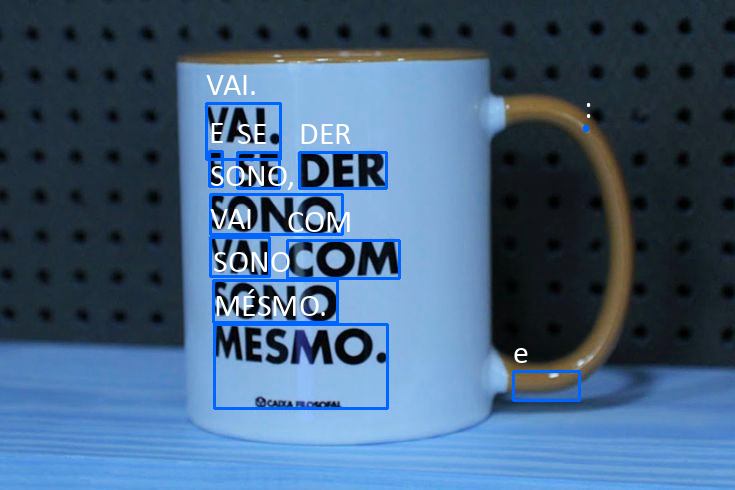

In [68]:
img_copia = rgb.copy()

for i in range(0, len(resultado['text'])):
  confianca = int(resultado['conf'][i])

  if confianca > min_conf:
    x, y, img = caixa_texto(resultado, img_copia)

    texto = resultado['text'][i]
    img_copia = escreve_texto(texto, x, y, img_copia, fonte)

cv2_imshow(img_copia)


In [69]:
resultado['conf']

['-1',
 '-1',
 '-1',
 '-1',
 85,
 63,
 '-1',
 '-1',
 56,
 56,
 91,
 '-1',
 '-1',
 91,
 '-1',
 '-1',
 48,
 90,
 '-1',
 '-1',
 89,
 '-1',
 '-1',
 60,
 54]

In [70]:
resultado['text']


['',
 '',
 '',
 '',
 'VAI.',
 ':',
 '',
 '',
 'E',
 'SE',
 'DER',
 '',
 '',
 'SONO,',
 '',
 '',
 'VAI',
 'COM',
 '',
 '',
 'SONO',
 '',
 '',
 'MÉSMO.',
 'e']

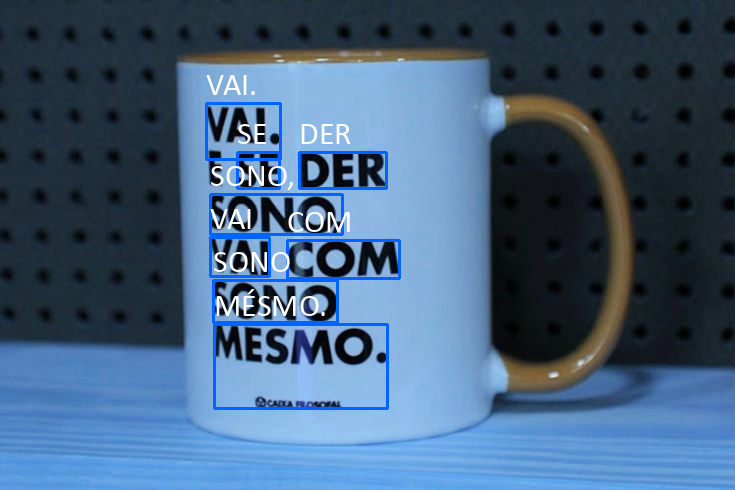

In [71]:
img_copia = rgb.copy()

for i in range(0, len(resultado['text'])):
  confianca = int(resultado['conf'][i])

  if confianca > min_conf:

    texto = resultado['text'][i]
    if not texto.isspace() and len(texto) > 1:

      x, y, img = caixa_texto(resultado, img_copia)
      img_copia = escreve_texto(texto, x, y, img_copia, fonte)

cv2_imshow(img_copia)
